In [2]:
# from sinfo import sinfo
# sinfo()

# https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images/code

In [3]:
import glob
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

In [4]:
def get_cols(df: pd.DataFrame) -> tuple:
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

    return numeric_columns, categorical_columns

In [5]:
df = []
for file_path in glob.glob('./data/fruits_dataset/**', recursive=True):
    file_path = file_path.replace('\\', '/')
    if any(file_path.endswith(filetype) for filetype in ['.jpg', '.png', '.jpeg']):
        class_name = file_path.split('/')[3]
        
        file_name = file_path.split('/')[-1]
        file_type = file_name[file_name.rfind('.'):]

        im = Image.open(file_path)
        height, width, depth = np.array(im).shape
        count_null_values = np.isnan(np.array(im)).sum()
        
        df.append([class_name, height, width, depth, count_null_values, file_type])
    # print(_) if _.endswith('.jpg') else print() # f'{_}/'
    
df = pd.DataFrame().from_records(df, columns=['class_name', 'height', 'width', 'depth', 'count_null_values', 'file_type'])
df

,class_name,height,width,depth,count_null_values,file_type
0,apple fruit,1749,1500,3,0,.jpg
1,apple fruit,1309,1500,3,0,.jpg
2,apple fruit,1732,1732,3,0,.jpg
3,apple fruit,1244,2000,3,0,.jpg
4,apple fruit,744,744,4,0,.png
...,...,...,...,...,...,...
346,strawberry fruit,1200,1920,3,0,.jpg
347,strawberry fruit,1356,1012,3,0,.jpg
348,strawberry fruit,1064,1600,3,0,.jpg
349,strawberry fruit,1235,1600,3,0,.jpg


In [6]:
num_cols, categorical_columns = get_cols(df)

In [7]:
df[num_cols].describe()

,height,width,depth,count_null_values
count,351.000000,351.000000,351.000000,351.0
mean,1240.931624,1623.678063,3.045584,0.0
std,856.373777,1215.334121,0.208879,0.0
min,167.000000,183.000000,3.000000,0.0
25%,662.000000,800.000000,3.000000,0.0
50%,1024.000000,1207.000000,3.000000,0.0
75%,1510.500000,1920.000000,3.000000,0.0
max,4742.000000,6134.000000,4.000000,0.0


In [8]:
df[num_cols].median()

height               1024.0
width                1207.0
depth                   3.0
count_null_values       0.0
dtype: float64

In [9]:
df[categorical_columns].describe()

,class_name,file_type
count,351,351
unique,9,3
top,apple fruit,.jpg
freq,40,315


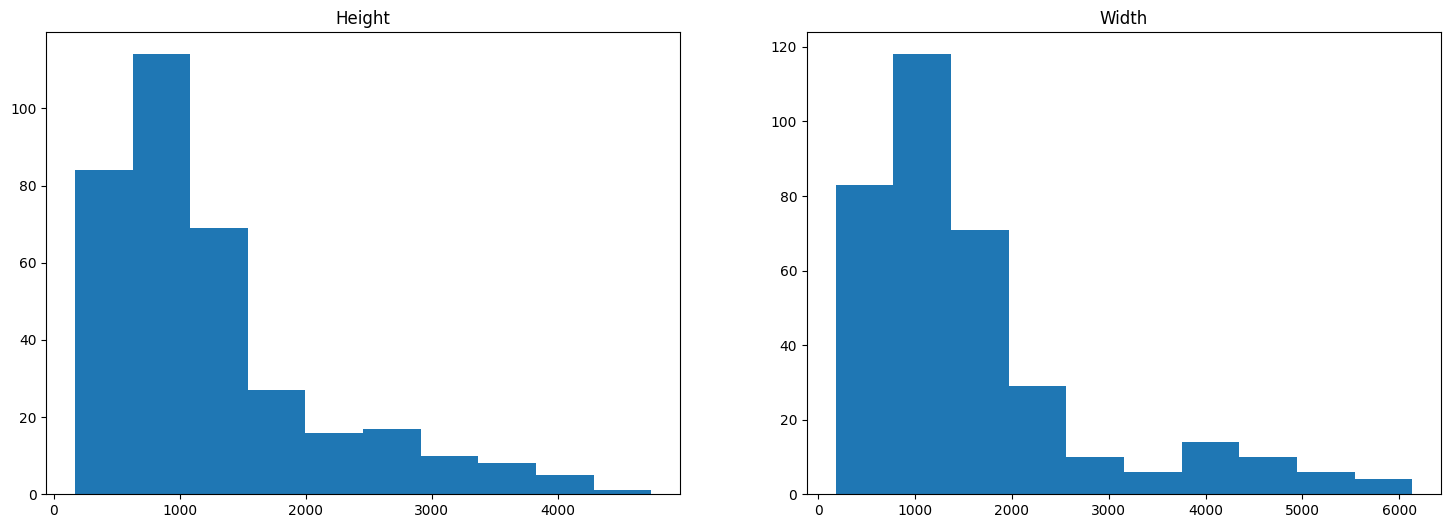

In [10]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(df['height'])
plt.title('Height')
plt.subplot(1, 2, 2)
plt.hist(df['width'])
plt.title('Width')
plt.show()

In [11]:
pd.concat([df['class_name'].value_counts(normalize=True), df['class_name'].value_counts()], axis=1)

,proportion,count
class_name,,
apple fruit,0.113960,40
cherry fruit,0.113960,40
grapes fruit,0.113960,40
strawberry fruit,0.113960,40
banana fruit,0.111111,39
chickoo fruit,0.111111,39
kiwi fruit,0.111111,39
mango fruit,0.105413,37
orange fruit,0.105413,37


<Axes: ylabel='Frequency'>

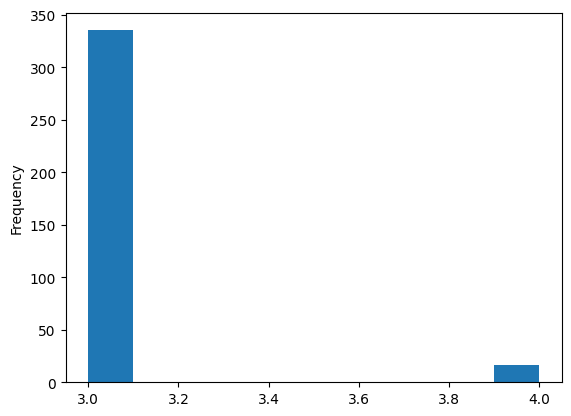

In [12]:
df['depth'].plot(kind='hist', bins=10)

In [13]:
df['depth'].value_counts(normalize=True)

depth
3    0.954416
4    0.045584
Name: proportion, dtype: float64

In [14]:
df.loc[df['depth'] == 4]['class_name'].value_counts()

class_name
apple fruit         5
banana fruit        3
kiwi fruit          3
cherry fruit        1
chickoo fruit       1
mango fruit         1
orange fruit        1
strawberry fruit    1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

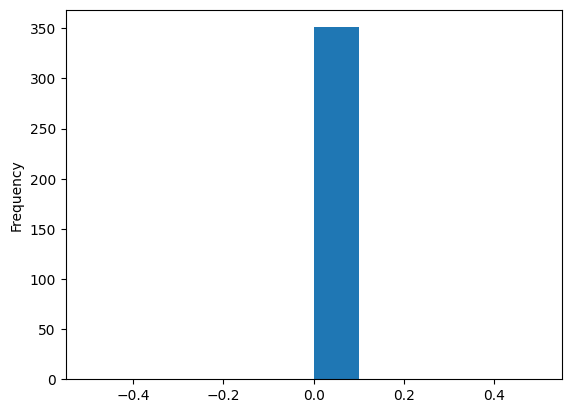

In [15]:
df['count_null_values'].plot(kind='hist', bins=10)

In [16]:
# !pip3 install scikit-image 

In [17]:
!pip3 install PyWavelets

You should consider upgrading via the 'C:\Users\jeff1\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [47]:
divisor = 4
new_height = 1024 // divisor
new_width = 1200 // divisor

import pywt

mat = []
target = []
for file_path in glob.glob('./data/fruits_dataset/**', recursive=True):
    file_path = file_path.replace('\\', '/')
    if any(file_path.endswith(filetype) for filetype in ['.jpg', '.png', '.jpeg']):
        im = Image.open(file_path)
        class_name = file_path.split('/')[3]

        height, width, depth = np.array(im).shape
        if depth == 4:
            continue
        resized_image = im.resize((new_height, new_width))

        # assuming your 3D numpy array is named 'arr'
        coeffs = pywt.dwt(resized_image, 'haar')
        arr_1d = coeffs[0].ravel()
        
        # print(arr_1d.shape)
        mat.append(arr_1d)
        target.append(class_name)
        # plt.hist(arr_1d)

# PCA -> Principal Component Analysis
mat = pd.DataFrame(mat)
mat['target'] = target

In [48]:
old_mat = mat.copy()

In [49]:
mat = old_mat.loc[old_mat['target'].isin(['apple fruit', 'banana fruit', 'kiwi fruit', 'orange fruit', 'grapes fruit'])].reset_index(drop=True)

In [50]:
mat

,0,1,2,3,4,5,6,7,8,9,...,153591,153592,153593,153594,153595,153596,153597,153598,153599,target
0,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,apple fruit
1,356.381818,356.381818,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,apple fruit
2,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,apple fruit
3,103.237590,55.154329,108.894444,70.710678,107.480231,70.710678,104.651804,67.882251,104.651804,67.882251,...,257.386868,321.733585,263.043723,321.733585,263.043723,321.733585,263.043723,321.733585,263.043723,apple fruit
4,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,apple fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,299.813275,121.622366,292.742207,91.923882,288.499567,77.781746,287.085353,69.296465,286.378246,59.396970,...,7.071068,159.806133,2.828427,162.634560,9.899495,158.391919,12.727922,159.099026,16.970563,orange fruit
179,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,orange fruit
180,313.955411,325.269119,314.662518,323.854906,316.783838,328.097546,316.783838,328.097546,316.783838,328.097546,...,156.977705,161.220346,159.806133,159.806133,159.806133,161.220346,158.391919,161.927453,161.220346,orange fruit
181,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,...,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,orange fruit


In [51]:
sample_df = mat.groupby('target').apply(lambda x: x.sample(n=1)).reset_index(drop=True)
sample_df

,0,1,2,3,4,5,6,7,8,9,...,153591,153592,153593,153594,153595,153596,153597,153598,153599,target
0,280.014285,131.521861,290.620887,142.835570,318.198052,175.362482,313.955411,169.705627,305.470129,166.877200,...,89.095454,204.353860,87.681241,197.989899,87.681241,200.111219,84.852814,224.859956,121.622366,apple fruit
1,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,banana fruit
2,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,grapes fruit
3,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,kiwi fruit
4,302.641702,274.357431,297.691955,271.529004,295.570635,265.872150,306.884343,274.357431,300.520382,271.529004,...,22.627417,29.698485,22.627417,30.405592,21.213203,30.405592,21.213203,28.284271,19.798990,orange fruit


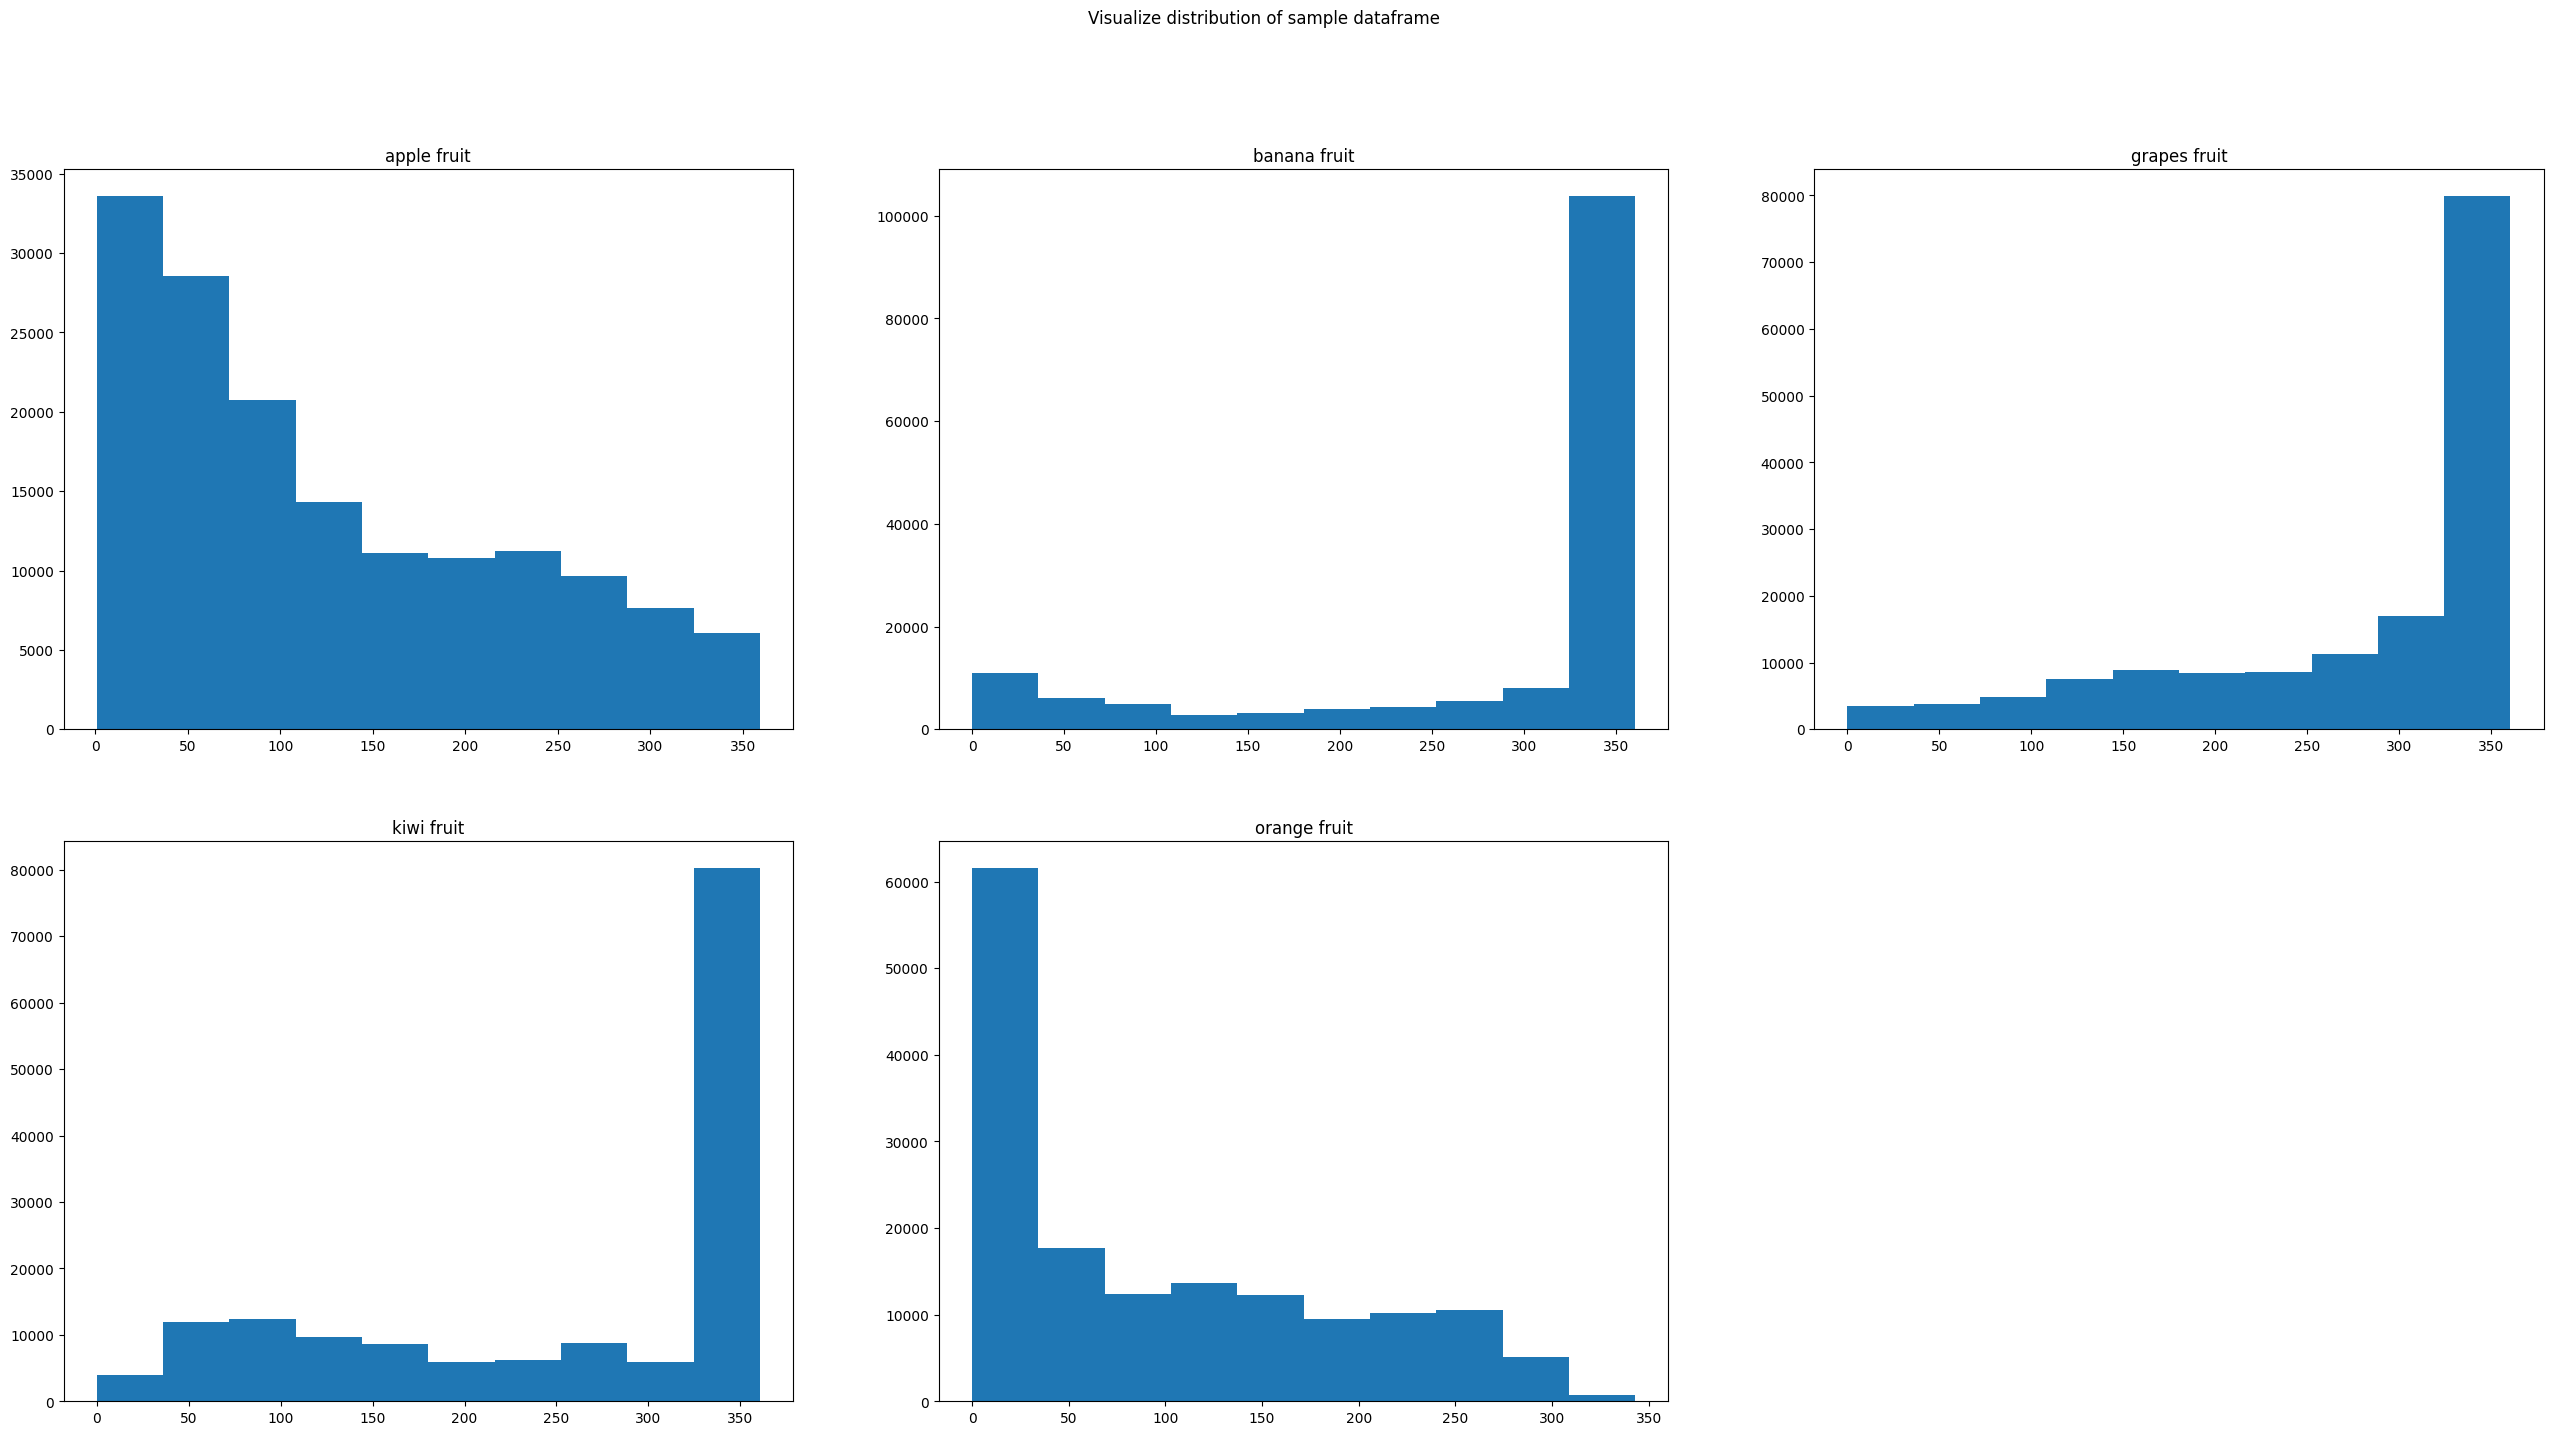

In [52]:
r = int(math.sqrt(len(sample_df)))
c = len(sample_df)//r + 1

it = 1
plt.figure(figsize=(32, 16))
plt.suptitle("Visualize distribution of sample dataframe")

for idx, row in sample_df.iterrows():
    plt.subplot(r, c, it)
    plt.hist(row[:-1].to_list())
    plt.title(row['target'])
    it += 1

In [53]:
num_cols, categorical_columns = get_cols(mat)

mat[num_cols].std().sort_values(ascending=False)

20645    153.360735
18621    153.134551
18619    152.540172
18109    152.438474
20149    152.402916
            ...    
88865     64.976485
94501     64.858904
93989     64.836216
92451     64.378467
92449     63.941392
Length: 153600, dtype: float64

In [59]:
mat

,0,1,2,3,4,5,6,7,8,9,...,153591,153592,153593,153594,153595,153596,153597,153598,153599,target
0,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,apple fruit
1,356.381818,356.381818,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,apple fruit
2,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,apple fruit
3,103.237590,55.154329,108.894444,70.710678,107.480231,70.710678,104.651804,67.882251,104.651804,67.882251,...,257.386868,321.733585,263.043723,321.733585,263.043723,321.733585,263.043723,321.733585,263.043723,apple fruit
4,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,apple fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,299.813275,121.622366,292.742207,91.923882,288.499567,77.781746,287.085353,69.296465,286.378246,59.396970,...,7.071068,159.806133,2.828427,162.634560,9.899495,158.391919,12.727922,159.099026,16.970563,orange fruit
179,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,...,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,360.624458,orange fruit
180,313.955411,325.269119,314.662518,323.854906,316.783838,328.097546,316.783838,328.097546,316.783838,328.097546,...,156.977705,161.220346,159.806133,159.806133,159.806133,161.220346,158.391919,161.927453,161.220346,orange fruit
181,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,...,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,359.210245,orange fruit


In [55]:
num_components = 32
pca = PCA(n_components=num_components)
mat_pca = pca.fit_transform(mat.drop('target', axis=1))

mat_pca_df = pd.DataFrame(mat_pca, columns=[f'PC_{_}' for _ in range(num_components)])
mat_pca_df['target'] = mat['target']

mat_pca_df

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,target
0,-9544.560566,-15181.241950,21160.338902,1549.719121,-4505.428867,-1090.742374,-3432.972895,6667.159469,1960.841925,-623.062469,...,1076.399734,-4267.365714,-2047.969561,3540.381855,-3961.064271,-5113.815596,-3778.462289,-3040.972707,-2459.540562,apple fruit
1,-38809.561159,-8735.709986,-19247.324862,2103.772791,-6425.940979,419.938593,4208.090810,-5475.258243,2988.847478,-7180.478029,...,530.275772,796.171763,1783.187035,-210.518369,171.160720,641.820646,-862.304945,-3147.164168,2821.000587,apple fruit
2,-18797.758051,-6432.064087,9475.587465,-6608.249541,-394.808516,-50.267903,-4423.251266,8114.020246,3612.757147,521.514311,...,1396.675406,2174.767940,467.272775,2975.081457,632.079181,-2312.596812,3219.427840,-681.839852,-1274.566259,apple fruit
3,13875.875454,-1731.491804,-1862.304598,-2036.692322,-5067.793658,1267.725056,-5380.811216,-1453.871503,6501.559994,-6885.591593,...,-1388.491169,3128.258220,3276.110008,2204.047770,-1491.650574,-5180.158134,1247.899263,3422.075458,6802.458480,apple fruit
4,-29544.792942,780.889945,-4284.116365,3769.662915,2422.297776,5367.989059,-7515.718625,-4939.006933,615.423961,1489.411325,...,4106.471804,-1216.809392,-62.787085,-1431.821159,-2381.566473,32.087811,-295.135764,-921.424021,-1053.761207,apple fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,38022.578995,21733.671840,-7336.795943,-3022.654705,-1415.329918,9895.227363,984.747756,-4022.930506,4096.606710,-3971.251648,...,-961.381302,-556.215261,3867.418527,1869.649019,-4035.208688,1108.935178,-5625.910217,1500.294356,1333.760414,orange fruit
179,-25627.591670,1232.886727,3321.320125,-9909.563227,-4628.949444,792.631803,-6761.362400,-684.415803,-4524.931988,-1510.804992,...,1679.351201,-3617.280127,1670.672945,2697.351553,1425.944646,1054.679340,-135.125364,-2444.714552,112.754909,orange fruit
180,-5897.337986,9956.087003,12951.358710,-12767.918553,-4520.702529,-2223.286836,-1364.229347,1835.088072,-6089.927986,10057.366217,...,-132.566312,1770.321670,1571.355459,-127.842770,970.073813,742.761513,-549.928244,-907.525537,1672.478222,orange fruit
181,-25519.051227,3268.734438,5175.349319,221.175217,-2675.462003,-1910.844912,-4878.639723,-5461.278696,5028.569165,2939.774115,...,-3588.465856,-118.415267,-2883.330179,2603.574427,579.753680,-1004.588882,2710.611700,470.305099,-3660.200965,orange fruit


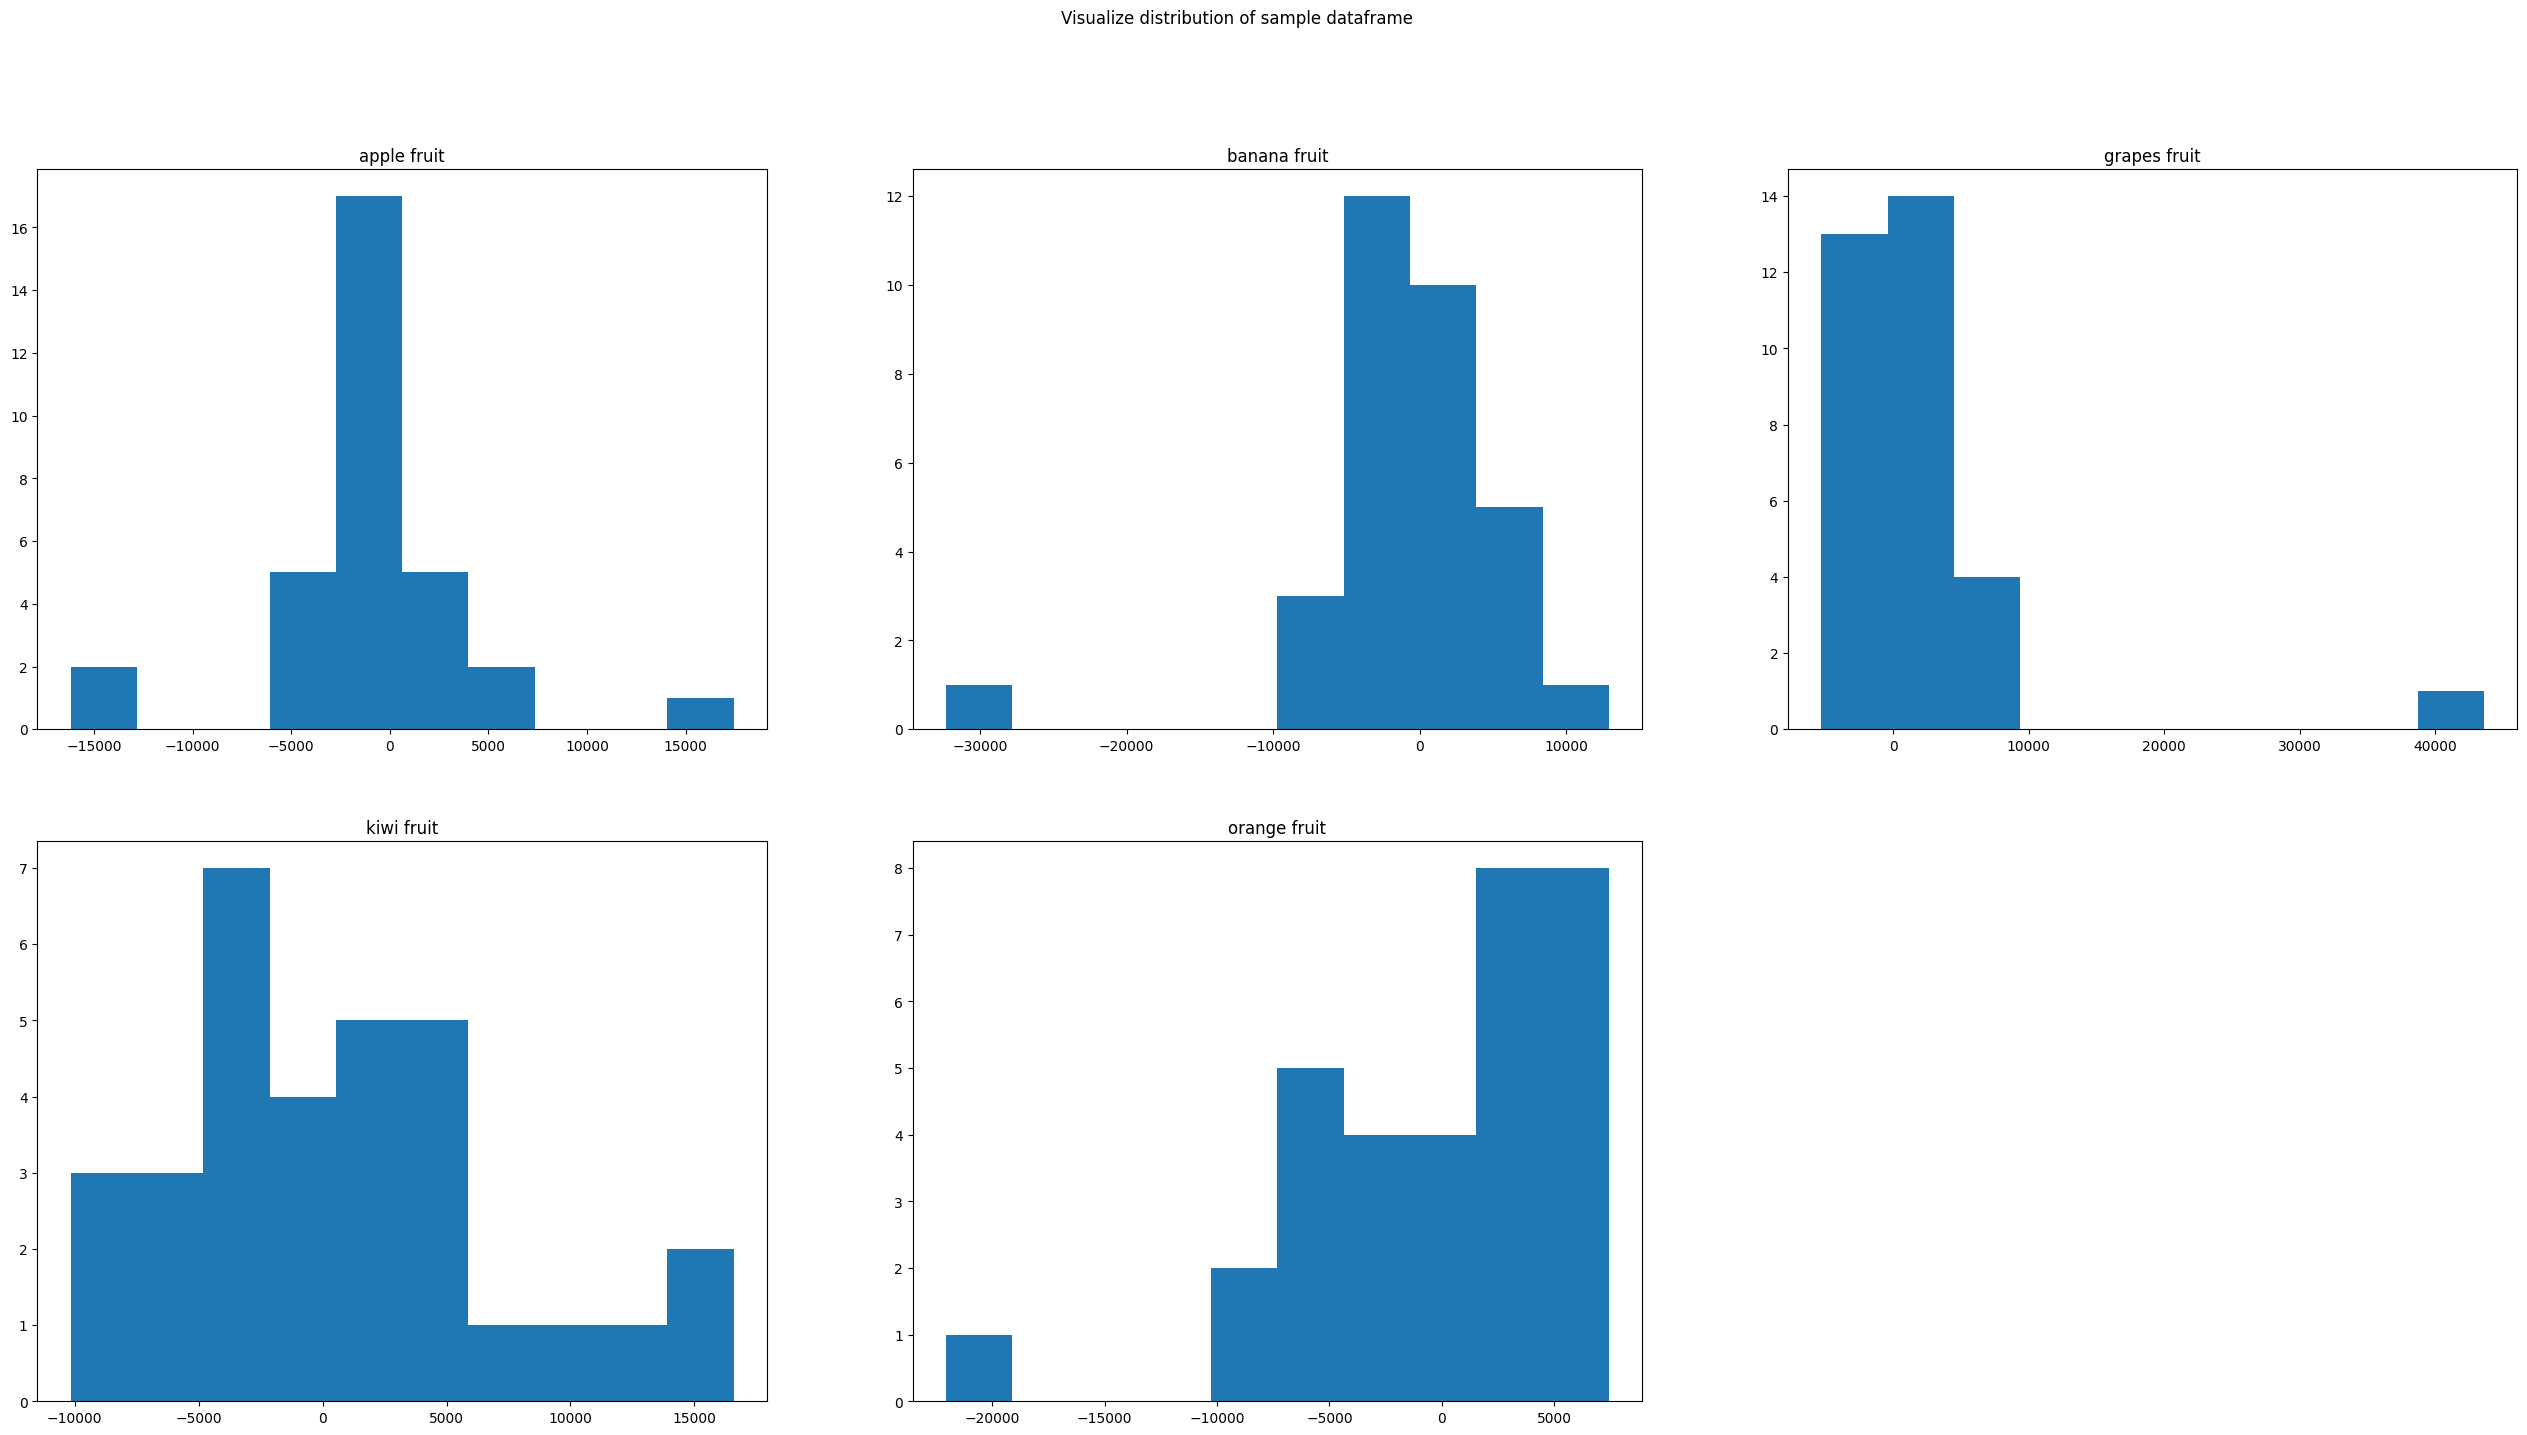

In [56]:
sample_pca_df = mat_pca_df.groupby('target').apply(lambda x: x.sample(n=1)).reset_index(drop=True)
r = int(math.sqrt(len(sample_pca_df)))
c = len(sample_pca_df)//r + 1

it = 1
plt.figure(figsize=(32, 16))
plt.suptitle("Visualize distribution of sample dataframe")

for idx, row in sample_pca_df.iterrows():
    plt.subplot(r, c, it)
    plt.hist(row[:-1].to_list())
    plt.title(row['target'])
    it += 1

In [63]:
num_cols, categorical_columns = get_cols(mat_pca_df)

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mat_pca_df[num_cols] = scaler.fit_transform(mat_pca_df[num_cols])

In [65]:
from sklearn.model_selection import train_test_split
X = mat_pca_df.drop('target', axis=1)
y = mat_pca_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True, stratify=y)

In [66]:
pd.concat([y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)], axis=1)

,proportion,proportion
target,,
grapes fruit,0.220183,0.216216
banana fruit,0.201835,0.189189
kiwi fruit,0.192661,0.202703
apple fruit,0.192661,0.189189
orange fruit,0.192661,0.202703


In [67]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score, roc_auc_score

def evaluate(y_true, y_pred):
    """Evaluate results of a model"""
    print("Confusion Matrix : \n" , confusion_matrix(y_true, y_pred))
    # print("Confusion Matrix proportion : \n" , confusion_matrix(y_true, y_pred, normalize='true'))
    
    print("Precision Score : " , precision_score(y_true, y_pred, average='macro'))
    print("Accuracy Score  : " , accuracy_score(y_true, y_pred))
    print("Recall Score    : " , recall_score(y_true, y_pred, average='macro'))
    print("F1 Score        : " , f1_score(y_true, y_pred, average='macro'))
    # print("ROC AUC Score :" , roc_auc_score(y_true, y_pred, average='macro', multi_class='ovo'))
    print("Classification Report : \n" , classification_report(y_true, y_pred))

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
# clf = SVC(random_state=42).fit(X_train, y_train)
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

# params_clf = {
#     'C': [0.25, 0.5, 1.0, 2.0, 100, 1000],
#     'class_weight': [None],
#     'dual': [False],
#     'fit_intercept': [True],
#     'intercept_scaling': [1],
#     'l1_ratio': [None, 0.5],
#     'max_iter': [100, 200],
#     'multi_class': ['auto'],
#     'n_jobs': [None],
#     'penalty': ['l2'],
#     'random_state': [42],
#     'solver': ['lbfgs'],
#     'tol': [0.0001],
#     'verbose': [0],
#     'warm_start': [False]
# }

# grid_dt = GridSearchCV(estimator=clf,
#                        param_grid=params_clf,
#                        scoring=make_scorer(f1_score, average='macro'),
#                        cv=3,
#                        n_jobs=4,    # Colab, Kaggle -1
#                        verbose=20
#                        )
# grid_dt.fit(X_train, y_train)

# clf = grid_dt.best_estimator_

# print(clf.get_params())

In [77]:
y_pred_train = clf.predict(X_train)
evaluate(y_train, y_pred_train)

Confusion Matrix : 
 [[13  2  3  2  1]
 [ 0 16  3  2  1]
 [ 0  2 22  0  0]
 [ 2  1  2 16  0]
 [ 1  0  0  0 20]]
Precision Score :  0.8033658008658009
Accuracy Score  :  0.7981651376146789
Recall Score    :  0.7954545454545455
F1 Score        :  0.7944847854093459
Classification Report : 
               precision    recall  f1-score   support

 apple fruit       0.81      0.62      0.70        21
banana fruit       0.76      0.73      0.74        22
grapes fruit       0.73      0.92      0.81        24
  kiwi fruit       0.80      0.76      0.78        21
orange fruit       0.91      0.95      0.93        21

    accuracy                           0.80       109
   macro avg       0.80      0.80      0.79       109
weighted avg       0.80      0.80      0.79       109



In [78]:
y_pred_test = clf.predict(X_test)
evaluate(y_test, y_pred_test)

Confusion Matrix : 
 [[ 7  2  3  2  0]
 [ 0  6  2  2  4]
 [ 2  0 11  2  1]
 [ 2  1  3  4  5]
 [ 0  6  0  2  7]]
Precision Score :  0.472081808800075
Accuracy Score  :  0.47297297297297297
Recall Score    :  0.46988095238095234
F1 Score        :  0.46723216566320014
Classification Report : 
               precision    recall  f1-score   support

 apple fruit       0.64      0.50      0.56        14
banana fruit       0.40      0.43      0.41        14
grapes fruit       0.58      0.69      0.63        16
  kiwi fruit       0.33      0.27      0.30        15
orange fruit       0.41      0.47      0.44        15

    accuracy                           0.47        74
   macro avg       0.47      0.47      0.47        74
weighted avg       0.47      0.47      0.47        74



In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

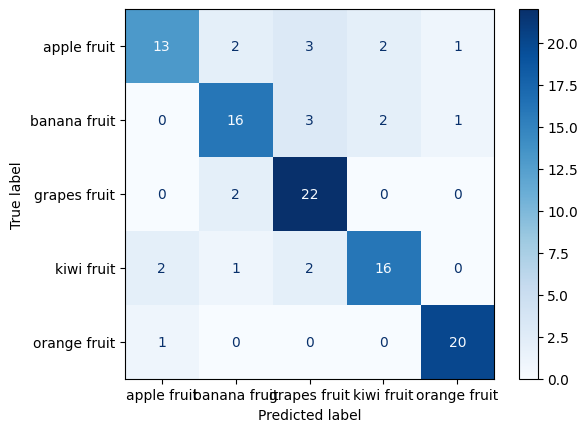

In [80]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues,
    # normalize=normalize,
)

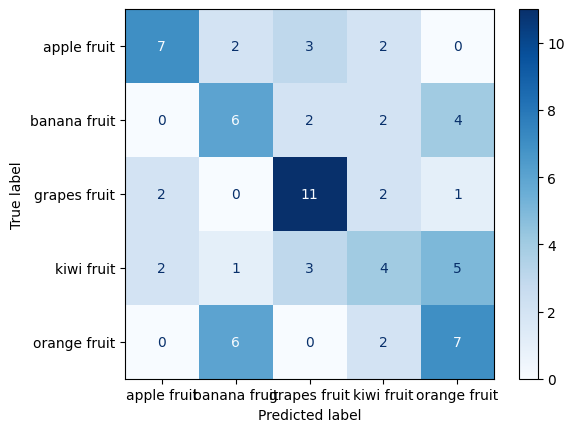

In [81]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues,
    # normalize=normalize,
)

In [82]:
# num_cols, categorical_columns = get_cols(mat_pca_df)
# mat_pca_df[num_cols].std().sort_values(ascending=False)

In [83]:
"""
1. Estandarizar las imagenes
2. Probar modelos de ML (matriz -> vector)
3. Probar modelos de DL (arquitectura)

TODO: try data augmentation
TODO: try deep learning

Logistic
Random Forest
GMM
NN
    CNN
"""


'\n1. Estandarizar las imagenes\n2. Probar modelos de ML (matriz -> vector)\n3. Probar modelos de DL (arquitectura)\n\nTODO: try data augmentation\nTODO: try deep learning\n\nLogistic\nRandom Forest\nGMM\nNN\n    CNN\n'